In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2024-08-19 20:01:08.020492: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/moz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()                                
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])        
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 

In [6]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.                        
    return results
x_train = vectorize_sequences(train_data)             
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
from tensorflow import keras 
from tensorflow.keras import layers
  
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.5219 - accuracy: 0.7911 - val_loss: 0.4020 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3284 - accuracy: 0.8893 - val_loss: 0.3804 - val_accuracy: 0.8397
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2477 - accuracy: 0.9173 - val_loss: 0.2924 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1995 - accuracy: 0.9333 - val_loss: 0.2768 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1682 - accuracy: 0.9443 - val_loss: 0.2837 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1433 - accuracy: 0.9535 - val_loss: 0.3107 - val_accuracy: 0.8773
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1215 - accuracy: 0.9635 - val_loss: 0.3237 - val_accuracy: 0.8781
Epoch 8/20
3

In [15]:
history_dict = history.history

In [16]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

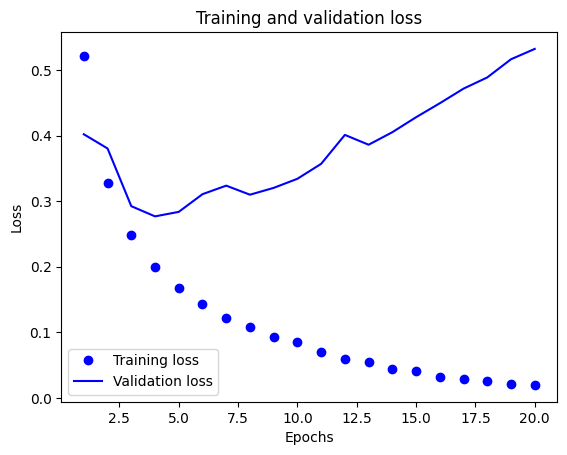

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")   
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [20]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [21]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4726 - accuracy: 0.8112
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2759 - accuracy: 0.9053
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2153 - accuracy: 0.9234
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3005 - accuracy: 0.8793


In [22]:
results

[0.30052778124809265, 0.8792799711227417]

In [23]:
model.predict(x_test)

782/782 [==============================] - 2s 1ms/step


array([[0.17816237],
       [0.99983954],
       [0.6235073 ],
       ...,
       [0.08881325],
       [0.05693669],
       [0.317098  ]], dtype=float32)